In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
# Connect to Google Drive
drive.mount('/content/drive')

# Define the file path and load dataset
data_path = '/content/drive/My Drive/Differentiated_Thyroid_Cancer.csv'
data = pd.read_csv(data_path)

Mounted at /content/drive


In [3]:
# Display random sample of data
print("Sample rows from the dataset:")
print(data.sample(10))

Sample rows from the dataset:
     Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
203   33      M      No         No              No        Euthyroid   
277   41      M     Yes         No              No        Euthyroid   
50    43      F      No         No              No        Euthyroid   
326   35      F      No         No              No        Euthyroid   
196   22      F      No         No              No        Euthyroid   
262   38      F      No         No              No        Euthyroid   
91    62      F      No         No              No        Euthyroid   
305   30      F      No         No              No        Euthyroid   
101   42      F      No         No              No        Euthyroid   
88    35      F      No         No              No        Euthyroid   

            Physical Examination Adenopathy       Pathology     Focality  \
203  Single nodular goiter-right         No       Papillary    Uni-Focal   
277  Single nodular goiter-right    

In [4]:
# Display data types and identify any missing values
print("\nColumn Data Types:")
print(data.dtypes)
print("\nMissing Values Check:")
print(data.isnull().sum())


Column Data Types:
Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

Missing Values Check:
Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0


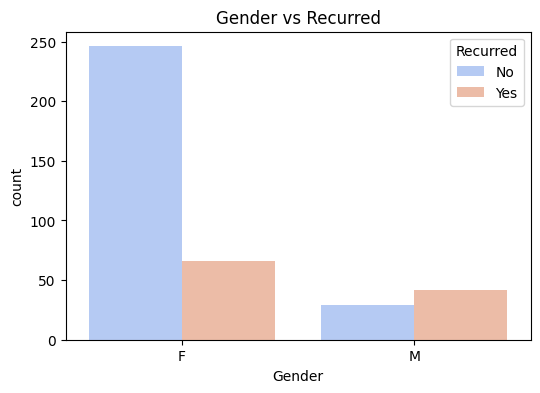

In [5]:
# EDA: Visualizations
# Plot gender distribution among recurrence cases
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Recurred', data=data, palette='coolwarm')
plt.title('Gender vs Recurred')
plt.show()

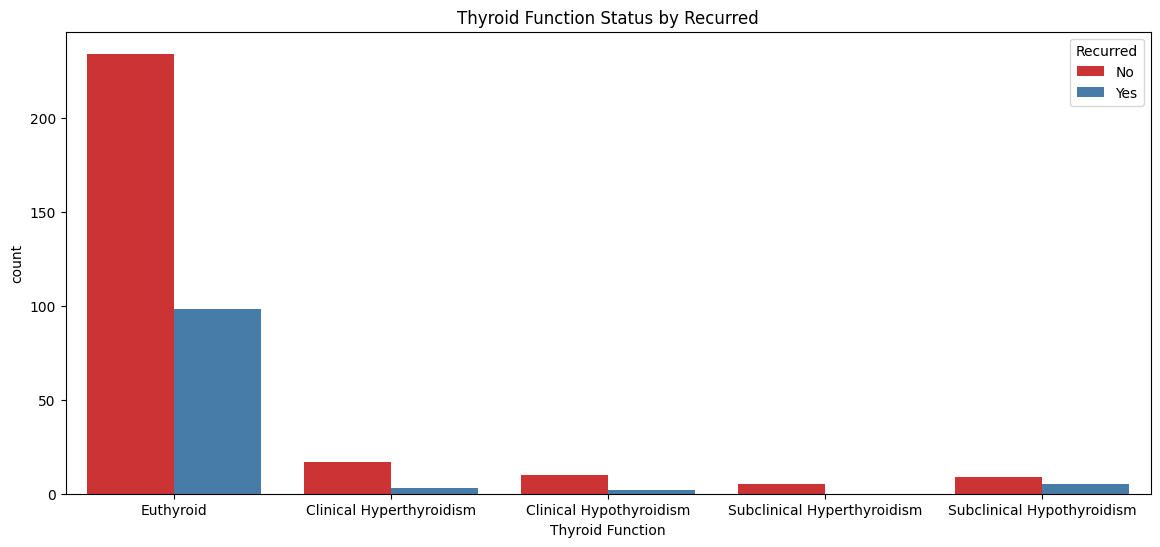

In [9]:
# Plot thyroid function based on recurrence cases
plt.figure(figsize=(14, 6))
sns.countplot(x='Thyroid Function', hue='Recurred', data=data, palette='Set1')
plt.title('Thyroid Function Status by Recurred')
plt.show()

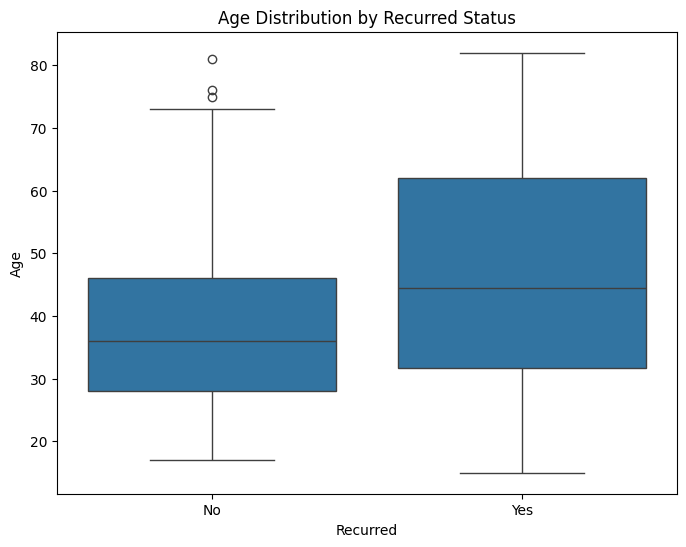

In [10]:
# Explore feature distributions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Recurred', y='Age', data=data)
plt.title('Age Distribution by Recurred Status')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define categorical columns to be encoded
categorical_features_thyroid = [
    'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
    'Thyroid Function', 'Physical Examination', 'Adenopathy',
    'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'
]

# Apply Label Encoding to categorical features
label_encoders_thyroid = {}
for feature in categorical_features_thyroid:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])
    label_encoders_thyroid[feature] = encoder  # Store encoders for reference
